In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
import json
from pathlib import Path

In [2]:
def load_json(dir):
    try:
        with open(dir) as f:
            data = json.load(f)
            
        return data
    
    except:
        return None

In [6]:
RESULT_DIR = "..\\result_summary"

In [20]:
def parse_file_nm(file_nm):
    mcts_info = None
    
    components = file_nm.split("\\")
    print(components)
    method = components[2]
    
    if method == 'am':
        _, _, method, _, prob_type, num_probs, model_info, baseline_info, _ = components
        
    elif method == 'mcts':
        _, _, _, method, _, prob_type, num_probs, model_info, baseline_info, mcts_info, _ = components


    
    num_probs = num_probs.split("-")[0]
    num_probs = int(num_probs.split("_")[1])
    baseline_info = baseline_info.split("-")[-1]
    
    return method, prob_type, num_probs, model_info, baseline_info, mcts_info

In [21]:
# parse all json file named with "all_result_avg.json" from the RESULT_DIR

all_result = {}

for file in glob.glob(f"{RESULT_DIR}/**/all_result_avg.json", recursive=True):
    data = load_json(file)
    method, prob_type, num_probs, model_info, baseline_info, mcts_info = parse_file_nm(file)
    
    if data is not None:
        
        if method not in all_result:
            all_result[method] = {}
        
        if prob_type not in all_result[method]:
            all_result[method][prob_type] = {}
            
        if num_probs not in all_result[method][prob_type]:
            all_result[method][prob_type][num_probs] = {}
        
        if mcts_info is None:
            if model_info not in all_result[method][prob_type][num_probs]:
                all_result[method][prob_type][num_probs][model_info] = {}
            
            if baseline_info not in all_result[method][prob_type][num_probs][model_info]:
                all_result[method][prob_type][num_probs][model_info][baseline_info] = data
                
        else:
            if model_info not in all_result[method][prob_type][num_probs]:
                all_result[method][prob_type][num_probs][model_info] = {}
                
            if baseline_info not in all_result[method][prob_type][num_probs][model_info]:
                all_result[method][prob_type][num_probs][model_info][baseline_info] = {}
                
            if mcts_info not in all_result[method][prob_type][num_probs][model_info][baseline_info]:
                all_result[method][prob_type][num_probs][model_info][baseline_info][mcts_info] = data 
                
    # break

['..', 'result_summary', 'debug', 'mcts_v2', 'debug', 'tsp', 'N_20-B_64', 'shared_mha-128-6-32-4-relu-10-0.0001', '1562-1-mean', 'ns_4000-temp_5-cpuct_1.1-norm_True-rollout_False-ec_0.0100', 'all_result_avg.json']


UnboundLocalError: local variable 'num_probs' referenced before assignment

In [11]:
print(load_json(file))

{'epoch=13-train_score=3.75413': {'result_avg': {'score': 4.042376303672791, 'runtime': 238.12934708595276}, 'result_std': {'score': 0.16460656367644846, 'runtime': 7290.028309046567}}, 'epoch=79-train_score=3.76020': {'result_avg': {'score': 3.9903258085250854, 'runtime': 223.37199873924254}, 'result_std': {'score': 0.15956302695321084, 'runtime': 4333.087784075738}}, 'epoch=165-train_score=3.76186': {'result_avg': {'score': 4.127797675132752, 'runtime': 243.94858348369598}, 'result_std': {'score': 0.1773779198196172, 'runtime': 8395.114347653363}}, 'epoch=137-train_score=3.76633': {'result_avg': {'score': 3.9293820381164553, 'runtime': 239.5464227437973}, 'result_std': {'score': 0.08728943815837963, 'runtime': 6648.079438234678}}, 'epoch=23-train_score=3.76809': {'result_avg': {'score': 3.9230421781539917, 'runtime': 245.53812835216522}, 'result_std': {'score': 0.08375706500285389, 'runtime': 9465.3792253329}}}


In [12]:
all_result['am']

KeyError: 'am'

In [13]:
def get_parital_result(method, prob_type, num_prob):       
    partial_result = {'model_info': [], 'baseline': [], 'mcts_info': [], 'epoch': [], 'score': [], 'runtime': [], 'score_std': []}
    
    def _append_epoch_result(model_info, baseline_info, epoch, mcts, epoch_score, epoch_score_std, epoch_runtime):
        partial_result['model_info'].append(model_info)
        partial_result['baseline'].append(baseline_info)
        partial_result['mcts_info'].append(mcts)
        partial_result['epoch'].append(epoch)                
        partial_result['score'].append(epoch_score)
        partial_result['score_std'].append(epoch_score_std)
        partial_result['runtime'].append(epoch_runtime)
        

    target_result = all_result[method][prob_type][num_prob]
    
    if method == 'am':
        for model_info in target_result:
            for baseline_info in target_result[model_info]:
                all_epoch_results = target_result[model_info][baseline_info]
                
                for epoch in all_epoch_results:
                    current_epoch_result = all_epoch_results[epoch]['result_avg']
                    epoch_score = current_epoch_result['score']
                    epoch_score_std = all_epoch_results[epoch]['result_std']['score']
                    epoch_runtime = current_epoch_result['runtime']
                    
                    _append_epoch_result(model_info, baseline_info, epoch, "am", epoch_score,epoch_score_std, epoch_runtime)
                    
    elif method == 'mcts':
        for model_info in target_result:
            for baseline_info in target_result[model_info]:
                all_mcts_results = target_result[model_info][baseline_info]
                
                for mcts_info in all_mcts_results:
                    all_epoch_results = all_mcts_results[mcts_info]
                    
                    for epoch in all_epoch_results:
                        current_epoch_result = all_epoch_results[epoch]['result_avg']
                        epoch_score = current_epoch_result['score']
                        epoch_score_std = all_epoch_results[epoch]['result_std']['score']
                        epoch_runtime = current_epoch_result['runtime']
                        
                        _append_epoch_result(model_info, baseline_info, epoch, mcts_info, epoch_score,epoch_score_std, epoch_runtime)                                         
            
    df = pd.DataFrame.from_dict(partial_result)
    df['activation'] = df['model_info'].apply(lambda x: x.split("-")[5])
    df = df.drop(columns=['model_info'])
    
    df['train_score'] = df.apply(lambda x: x['epoch'].split("-")[1].split("=")[1], axis=1).astype(float)
    df['epoch'] =  df.apply(lambda x: x['epoch'].split("-")[0].split("=")[1], axis=1).astype(int)
    
    if method == 'mcts':
        df['cpuct'] = df['mcts_info'].apply(lambda x: x.split("-")[2].split('_')[1])
        df['ns'] = df['mcts_info'].apply(lambda x: x.split("-")[0].split('_')[1])
        df['cpuct'] = df['cpuct'].astype(float)
        df['ns'] = df['ns'].astype(int)
    
    elif method == 'am':
        df['cpuct'] = np.nan
        df['ns'] = np.nan
        
    df = df.drop(columns=['mcts_info'])
    

        
    return df

In [14]:
am_tsp_20 = get_parital_result('am', 'tsp', 20)
am_tsp_20

KeyError: 'am'

In [15]:
mcts_tsp_20 = get_parital_result('mcts', 'tsp', 20)
mcts_tsp_20

KeyError: 'mcts'

In [64]:
all_tsp_20 = pd.concat([am_tsp_20, mcts_tsp_20])
all_tsp_20

,baseline,epoch,score,runtime,score_std,activation,train_score,cpuct,ns
0,mean,13,3.886949,0.095240,0.098306,relu,3.75413,NaN,NaN
1,mean,165,3.849429,0.095860,0.084770,relu,3.76186,NaN,NaN
2,mean,23,3.872111,0.095910,0.091890,relu,3.76809,NaN,NaN
3,mean,137,3.853610,0.096530,0.087185,relu,3.76633,NaN,NaN
4,mean,79,3.858670,0.095090,0.086744,relu,3.76020,NaN,NaN
...,...,...,...,...,...,...,...,...,...
225,val,105,6.933776,0.375593,0.479316,swiglu,3.75984,2.0,50.0
226,val,85,6.891629,0.371180,0.537042,swiglu,3.77306,2.0,50.0
227,val,193,7.003033,0.374259,0.485748,swiglu,3.77567,2.0,50.0
228,val,113,6.956660,0.375327,0.602138,swiglu,3.78154,2.0,50.0


In [69]:
def plot_bar_result(base_df, baseline, activation, prob_type, num_prob, plot_dev=False, hue='cpuct'):
    if prob_type == 'tsp':
        y_ranges = {20: (3.75, 3.95), 50: (5.7, 5.875), 100: (7.95, 8.25)}
        
    elif prob_type == 'cvrp':
        y_ranges = {20: (6.1, 7.5), 50: (9, 12), 100: (7.95, 8.25)}
        
    _df = base_df[(base_df['baseline'] == baseline) & (base_df['activation'] == activation)]
    
    # drop rows where the mcts_info is 0.8
    _df = _df[_df['cpuct'] != '0.8']
    
    # sort by the train score
    _df = _df.sort_values(by=['epoch', 'cpuct', 'ns']).reset_index(drop=True)
    
    plt.figure(figsize=(12, 7))
    
    ax = sns.barplot(data=_df, x=_df['epoch'], y='score', hue=hue)
    
    if plot_dev:
        bar_coords = [(rect.get_x(), rect.get_y(), rect.get_width(), rect.get_height()) for rect in ax.patches]
                
        for i, (x, y, w, h) in enumerate(bar_coords):
            x_pos = x + w / 2
            y_top = y + h + 0.01
            
            plt.errorbar(x=x_pos, y=y_top, yerr=_df['score_std'][i], fmt='none', color='black', capsize=4)
    
    plt.title(f"{prob_type}_{num_prob}_{baseline}_{activation}")
    plt.ylim(*y_ranges[num_prob])
    plt.legend()
    
    path = Path(f"../result_image/bars")
    
    if not path.exists():
        path.mkdir(parents=True)
        
    
    plt.savefig(f"{path}/{prob_type}_{num_prob}_{baseline}_{activation}.png")
    plt.show()

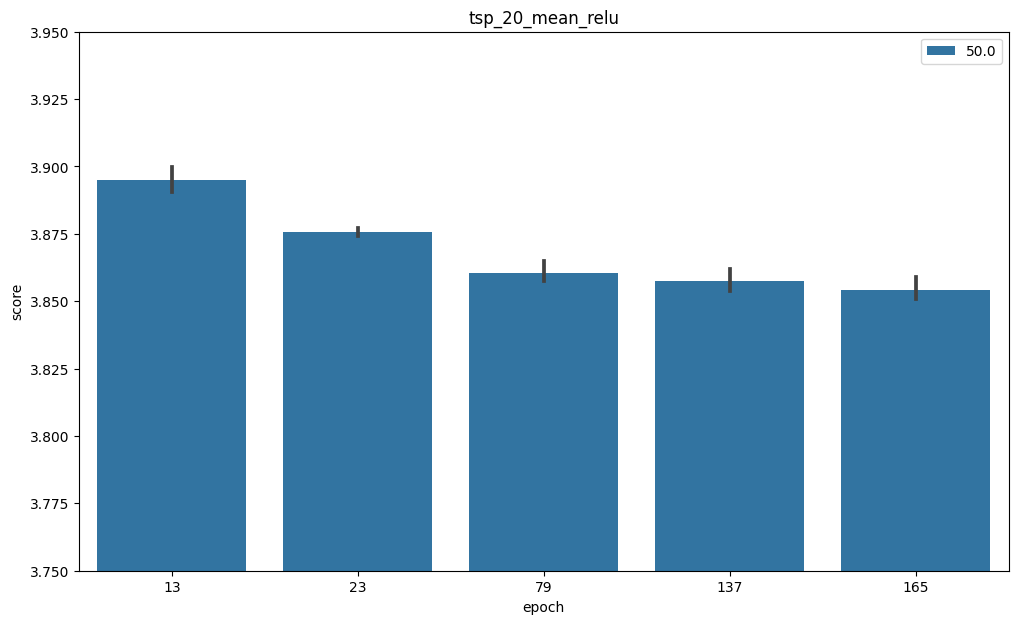

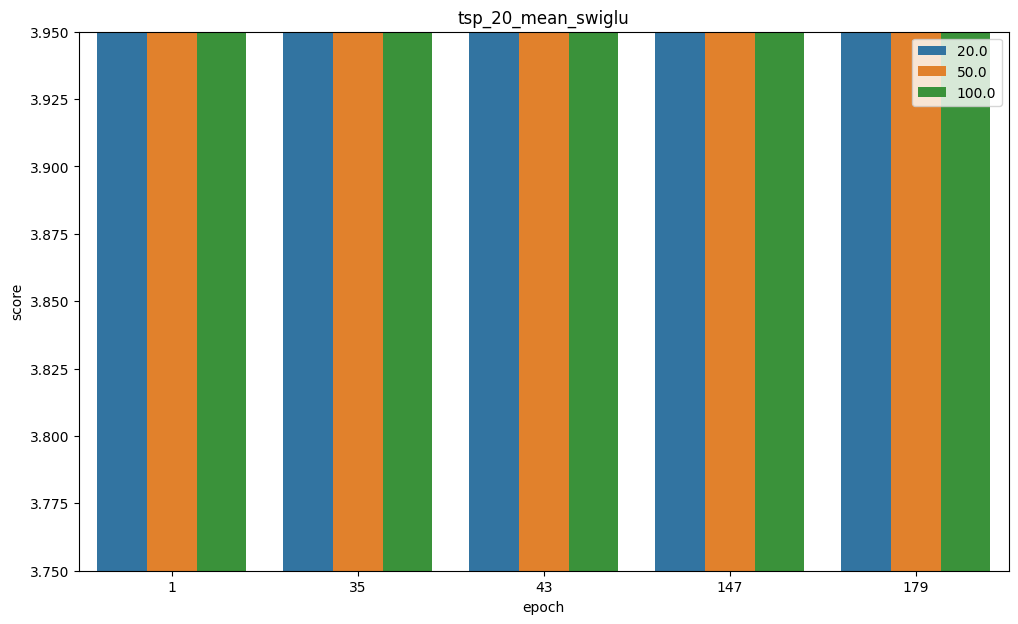

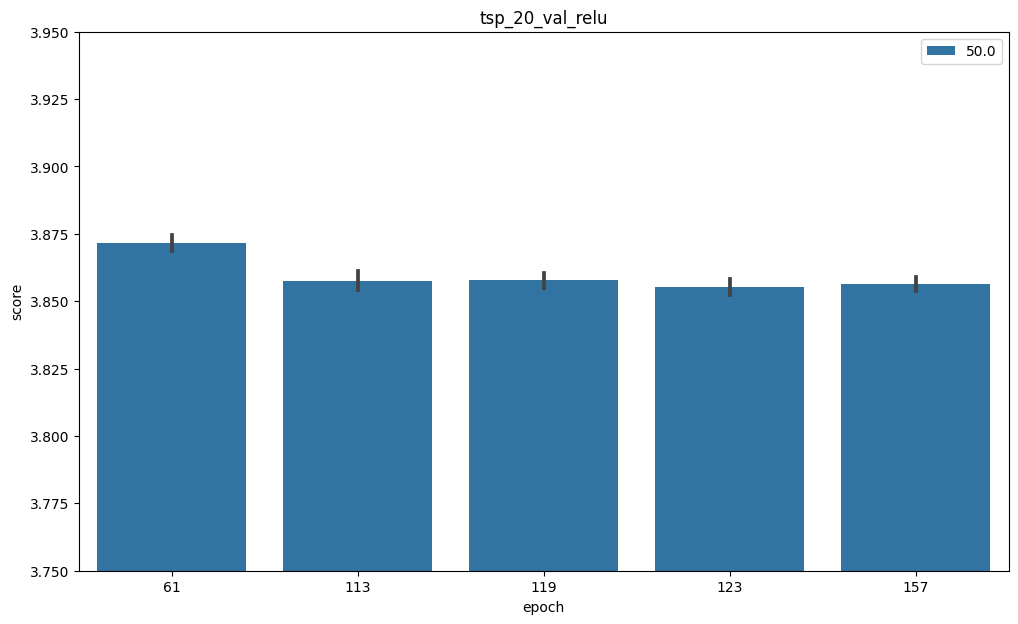

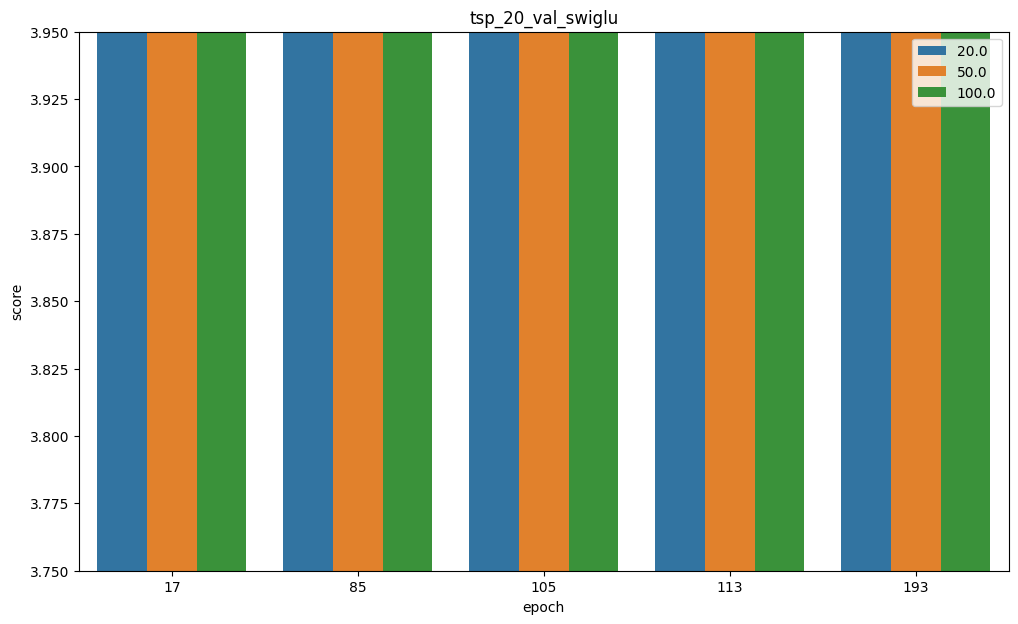

In [71]:
tsp_20 = pd.concat([get_parital_result('am', 'tsp', 20), get_parital_result('mcts', 'tsp', 20)])

for _baseline in ['mean', 'val']:
    for _activation in ['relu', 'swiglu']:
        plot_bar_result(tsp_20, _baseline, _activation, 'tsp', 20, hue='ns')

In [45]:
# tsp_50 = pd.concat([get_parital_result('am', 'tsp', 50), get_parital_result('mcts', 'tsp', 50, leave_only_puct=True)])

# for _baseline in ['mean', 'val']:
#     for _activation in ['relu', 'swiglu']:
#         plot_bar_result(tsp_50, _baseline, _activation, 'tsp', 50)

In [30]:
# tsp_100 = pd.concat([get_parital_result('am', 'tsp', 100), get_parital_result('mcts', 'tsp', 100, leave_only_puct=True)])

# for _baseline in ['mean', 'val']:
#     for _activation in ['relu', 'swiglu']:
#         plot_bar_result(tsp_100, _baseline, _activation, 'tsp', 100)

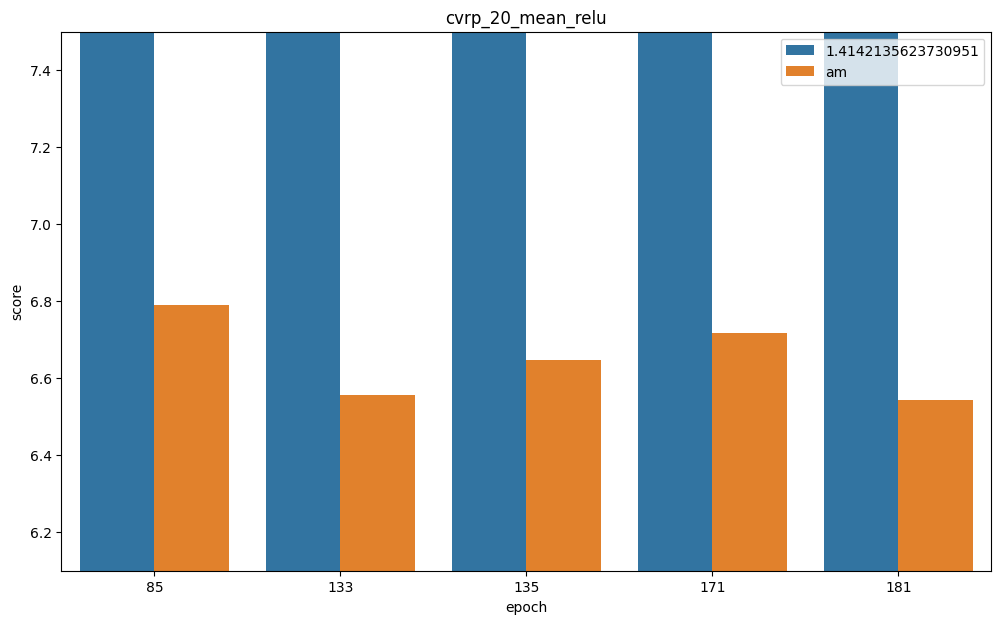

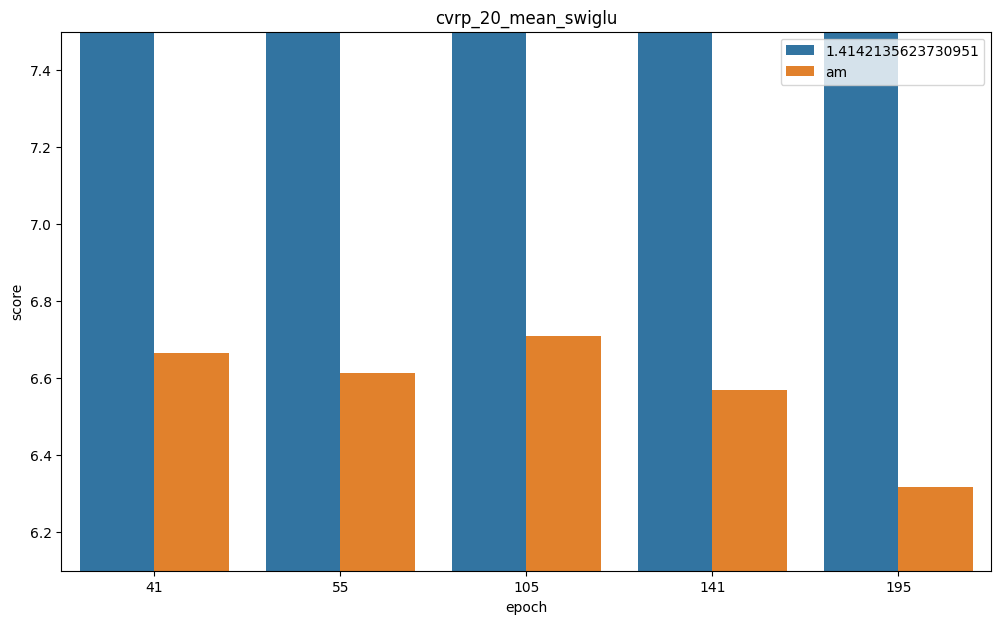

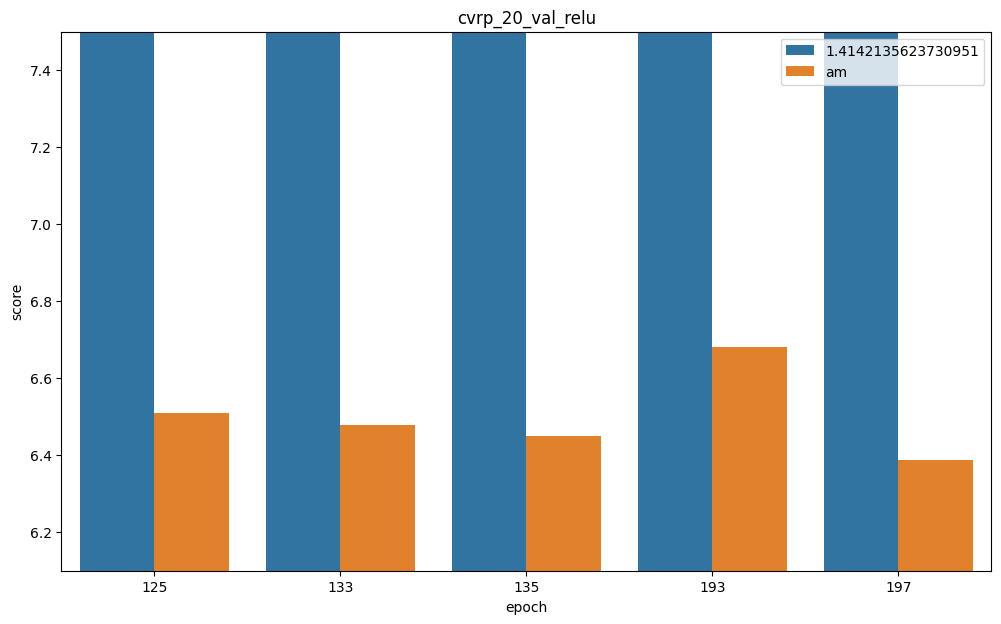

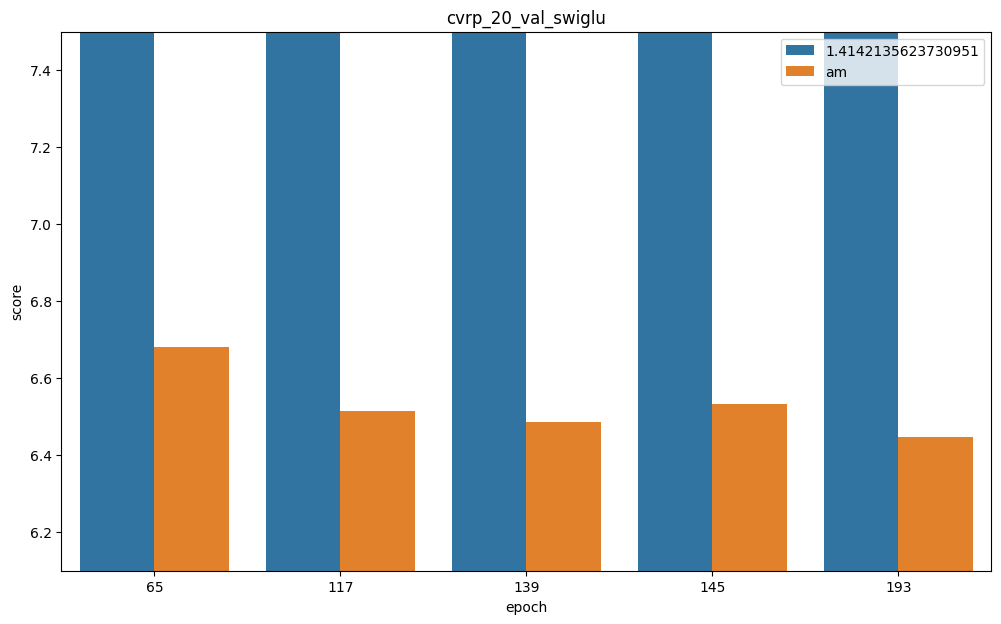

In [34]:
cvrp_20 = pd.concat([get_parital_result('am', 'cvrp', 20), get_parital_result('mcts', 'cvrp', 20, leave_only_puct=True)])

for _baseline in ['mean', 'val']:
    for _activation in ['relu', 'swiglu']:
        plot_bar_result(cvrp_20, _baseline, _activation, 'cvrp', 20)

In [33]:
cvrp_20.pivot_table(index=['mcts_info'], columns=['baseline', 'activation'], values='score')

baseline                mean                 val          
activation              relu    swiglu      relu    swiglu
mcts_info                                                 
1.4142135623730951  8.804470  9.145697  8.964714  9.128793
am                  6.650682  6.575107  6.501822  6.532847

In [ ]:
cvrp_100 = pd.concat([get_parital_result('am', 'cvrp', 50), get_parital_result('mcts', 'cvrp', 50, leave_only_puct=True)])

for _baseline in ['mean', 'val']:
    for _activation in ['relu', 'swiglu']:
        plot_bar_result(cvrp_100, _baseline, _activation, 'cvrp', 50)